In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [494]:
data_train=pd.read_csv('/Users/home/Documents/Project techstack/python csv/carInsurance_train.csv')
data_test=pd.read_csv('/Users/home/Documents/Project techstack/python csv/carInsurance_test.csv')

In [495]:
data_train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [496]:
data_test.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [497]:
data_f = pd.concat([data_train,data_test],axis=0)

In [498]:
data_f.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0.0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0.0


In [499]:
data_f.shape

(5000, 19)

In [500]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                5000 non-null   int64  
 1   Age               5000 non-null   int64  
 2   Job               4976 non-null   object 
 3   Marital           5000 non-null   object 
 4   Education         4784 non-null   object 
 5   Default           5000 non-null   int64  
 6   Balance           5000 non-null   int64  
 7   HHInsurance       5000 non-null   int64  
 8   CarLoan           5000 non-null   int64  
 9   Communication     3877 non-null   object 
 10  LastContactDay    5000 non-null   int64  
 11  LastContactMonth  5000 non-null   object 
 12  NoOfContacts      5000 non-null   int64  
 13  DaysPassed        5000 non-null   int64  
 14  PrevAttempts      5000 non-null   int64  
 15  Outcome           1201 non-null   object 
 16  CallStart         5000 non-null   object 
 

In [501]:
data_f.corr()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
Id,1.000000,0.009291,-0.001931,-0.017094,0.011585,-0.014993,-0.017696,-0.003105,0.014125,0.019420,-0.017864
Age,0.009291,1.000000,-0.004050,0.087753,-0.182377,-0.018593,0.016128,0.018279,-0.009774,0.014811,0.039158
Default,-0.001931,-0.004050,1.000000,-0.056292,0.002459,0.114014,0.011710,0.022343,-0.013758,-0.028748,-0.039506
Balance,-0.017094,0.087753,-0.056292,1.000000,-0.075793,-0.083901,0.007725,-0.009262,0.003609,0.012897,0.041561
HHInsurance,0.011585,-0.182377,0.002459,-0.075793,1.000000,0.079049,-0.022277,-0.011989,0.077391,0.020054,-0.203419
CarLoan,-0.014993,-0.018593,0.114014,-0.083901,0.079049,1.000000,0.015444,0.019252,-0.041898,-0.023539,-0.092131
LastContactDay,-0.017696,0.016128,0.011710,0.007725,-0.022277,0.015444,1.000000,0.144971,-0.074961,-0.071895,-0.061271
NoOfContacts,-0.003105,0.018279,0.022343,-0.009262,-0.011989,0.019252,0.144971,1.000000,-0.102470,-0.062935,-0.114884
DaysPassed,0.014125,-0.009774,-0.013758,0.003609,0.077391,-0.041898,-0.074961,-0.102470,1.000000,0.503369,0.138943
PrevAttempts,0.019420,0.014811,-0.028748,0.012897,0.020054,-0.023539,-0.071895,-0.062935,0.503369,1.000000,0.148763


<AxesSubplot:>

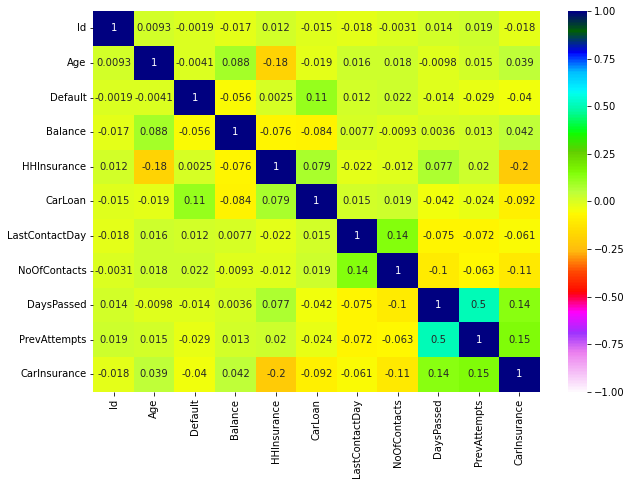

In [502]:
plt.figure(figsize=(10,7))
sns.heatmap(data_f.corr(),annot=True,vmin=-1,vmax=1,cmap='gist_ncar_r')

# Explore and target variable

0.0    2396
1.0    1604
Name: CarInsurance, dtype: int64


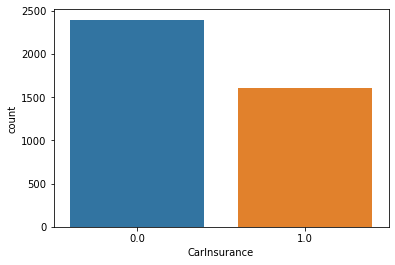

In [503]:
print(data_f['CarInsurance'].value_counts())
sns.countplot(data_f['CarInsurance'])
plt.show()

# Detect the missimg values 

In [504]:
data_f.isnull().sum()

Id                     0
Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [505]:
((data_f.isnull().sum()/data_f.isnull().count())*100).sort_values(ascending=False)

Outcome             75.98
Communication       22.46
CarInsurance        20.00
Education            4.32
Job                  0.48
Marital              0.00
Default              0.00
Balance              0.00
HHInsurance          0.00
CarLoan              0.00
Age                  0.00
LastContactDay       0.00
LastContactMonth     0.00
NoOfContacts         0.00
DaysPassed           0.00
PrevAttempts         0.00
CallStart            0.00
CallEnd              0.00
Id                   0.00
dtype: float64

In [506]:
#outcome is 75 % missing

In [507]:
del data_train['Outcome']

In [508]:
del data_test['Outcome']

In [509]:
del data_f['Outcome']

In [510]:
((data_f.isnull().sum()/data_f.isnull().count())*100).sort_values(ascending=False)

Communication       22.46
CarInsurance        20.00
Education            4.32
Job                  0.48
Marital              0.00
Default              0.00
Balance              0.00
HHInsurance          0.00
CarLoan              0.00
Age                  0.00
LastContactDay       0.00
LastContactMonth     0.00
NoOfContacts         0.00
DaysPassed           0.00
PrevAttempts         0.00
CallStart            0.00
CallEnd              0.00
Id                   0.00
dtype: float64

In [511]:
data_f['Education'].value_counts()

secondary    2489
tertiary     1601
primary       694
Name: Education, dtype: int64

In [512]:
data_f['Job'].value_counts()

management       1114
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [513]:
data_f['Job'].fillna('management',inplace= True)

In [514]:
data_f['Job'].isnull().sum()

0

In [515]:
data_f['Job'].dtype

dtype('O')

In [516]:
data_f['Education'].fillna('secondary', inplace=True)

# Outlier and detection or treatment

<AxesSubplot:xlabel='NoOfContacts'>

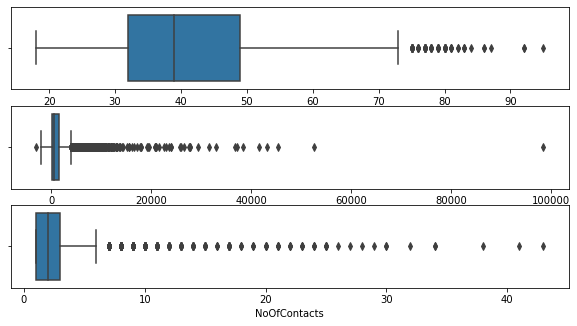

In [517]:
plt.figure(figsize=(10,7))
plt.subplot(4,1,1)
sns.boxplot(data_f['Age'])
plt.subplot(4,1,2)
sns.boxplot(data_f['Balance'])
plt.subplot(4,1,3)
sns.boxplot(data_f['NoOfContacts'])


In [518]:
data_f[data_f['NoOfContacts']>40]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
3168,3169,33,blue-collar,married,secondary,0,0,1,1,cellular,31,jul,43,-1,0,17:56:12,17:56:28,0.0
3575,3576,28,blue-collar,single,secondary,0,623,0,0,NaN,18,jun,41,-1,0,10:27:24,10:27:49,0.0


In [519]:
data_f.drop(index=data_f[data_f['NoOfContacts']>40].index, inplace=True)

In [520]:
data_f[data_f['Balance']>95000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,10:51:42,10:54:07,0.0


In [521]:
data_f.drop(index=data_f[data_f['Balance']>95000].index, inplace=True)

<AxesSubplot:xlabel='Balance'>

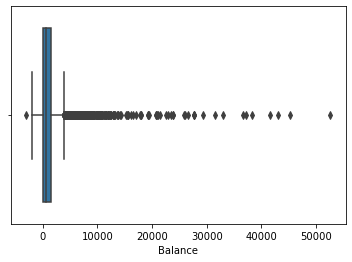

In [522]:
sns.boxplot(data_f['Balance'])


In [523]:
data_f[data_f['Balance']>50000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
163,164,61,self-employed,divorced,tertiary,0,52587,0,0,cellular,15,feb,3,189,1,16:53:39,17:00:13,1.0


In [524]:
data_f.drop(index=data_f[data_f['Balance']>50000].index, inplace=True)

# Feature selection

In [525]:
data_f.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0.0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,14:49:03,14:52:08,0.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0.0


In [526]:
data_f.drop(columns=['Default','CallStart','CallEnd'], inplace=True)

In [527]:
data_test.drop(columns=['Default','CallStart','CallEnd'], inplace=True)

In [528]:
data_train.drop(columns=['Default','CallStart','CallEnd'], inplace=True)

In [529]:
data_f.head()

,Id,Age,Job,Marital,Education,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32,management,single,tertiary,1218,1,0,telephone,28,jan,2,-1,0,0.0
1,2,32,blue-collar,married,primary,1156,1,0,NaN,26,may,5,-1,0,0.0
2,3,29,management,single,tertiary,637,1,0,cellular,3,jun,1,119,1,1.0
3,4,25,student,single,primary,373,1,0,cellular,11,may,2,-1,0,1.0
4,5,30,management,married,tertiary,2694,0,0,cellular,3,jun,1,-1,0,0.0


#  Feature engineering 

In [530]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [531]:
data_f['NoOfContacts']=le.fit_transform(data_f['NoOfContacts'])

In [532]:
data_f['Job']=le.fit_transform(data_f['Job'])

In [533]:
#data_f['Out']=le.fit_transform(data_f['NoOfContacts'])

In [534]:
data_train['CarInsurance']=le.fit_transform(data_train['CarInsurance'])

In [535]:
data_test.head(40)

,Id,Age,Job,Marital,Education,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,4001,25,admin.,single,secondary,1,1,1,NaN,12,may,12,-1,0,NaN
1,4002,40,management,married,tertiary,0,1,1,cellular,24,jul,1,-1,0,NaN
2,4003,44,management,single,tertiary,-1313,1,1,cellular,15,may,10,-1,0,NaN
3,4004,27,services,single,secondary,6279,1,0,cellular,9,nov,1,-1,0,NaN
4,4005,53,technician,married,secondary,7984,1,0,cellular,2,feb,1,-1,0,NaN
5,4006,28,management,single,tertiary,12956,1,0,cellular,2,jul,1,399,3,NaN
6,4007,39,blue-collar,married,secondary,1044,1,0,cellular,2,feb,1,-1,0,NaN
7,4008,50,management,married,tertiary,414,1,0,cellular,3,apr,1,302,3,NaN
8,4009,56,management,divorced,tertiary,408,1,0,NaN,27,may,1,-1,0,NaN
9,4010,36,self-employed,married,secondary,1006,1,0,cellular,21,nov,2,-1,0,NaN


In [536]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Marital','Education','Communication','LastContactMonth','Job' ]:
    data_train[col] = le.fit_transform(data_train[col])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Marital','Education','Communication','LastContactMonth','Job']:
    data_test[col] = le.fit_transform(data_test[col])
le = LabelEncoder()
for col in ['Marital','Education','Communication','LastContactMonth','Job']:
    data_f[col] = le.fit_transform(data_f[col])    

In [537]:
data_test.dtypes

Id                    int64
Age                   int64
Job                   int64
Marital               int64
Education             int64
Balance               int64
HHInsurance           int64
CarLoan               int64
Communication         int64
LastContactDay        int64
LastContactMonth      int64
NoOfContacts          int64
DaysPassed            int64
PrevAttempts          int64
CarInsurance        float64
dtype: object

In [539]:
data_f.dtypes

Id                    int64
Age                   int64
Job                   int64
Marital               int64
Education             int64
Balance               int64
HHInsurance           int64
CarLoan               int64
Communication         int64
LastContactDay        int64
LastContactMonth      int64
NoOfContacts          int64
DaysPassed            int64
PrevAttempts          int64
CarInsurance        float64
dtype: object

In [540]:
#data_['CarInsurance'] = data_f['CarInsurance'].astype(np.int64)
#data_train['CarInsurance'] = data_train['CarInsurance'].astype(np.int64)


In [541]:
x=data_train.drop(columns=['CarInsurance'])
y=data_train['CarInsurance']

In [542]:
from sklearn.model_selection import train_test_split

In [543]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y,train_size=0.95)

In [544]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3800, 14) (200, 14) (3800,) (200,)


In [545]:
from sklearn.linear_model import LogisticRegression

In [546]:
model_lr = LogisticRegression()

In [547]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [548]:
y_pred = model_lr.predict(x_test)

In [549]:
pd.DataFrame({"Actual":y_test,'Predicted':y_pred})

,Actual,Predicted
3369,0,0
3317,0,0
53,1,0
3352,1,0
3946,1,0
3903,0,0
2631,1,1
3448,1,0
2777,0,0
2253,0,0


In [550]:
y_pred_soft = model_lr.predict_proba(x_test)

In [551]:
y_pred_soft[:,1]

array([0.05703664, 0.43901916, 0.39507466, 0.28634666, 0.29619155,
       0.35270613, 0.61397324, 0.38954268, 0.42751151, 0.46159107,
       0.46921625, 0.41617327, 0.35032616, 0.10361827, 0.42987023,
       0.2504976 , 0.5347834 , 0.53109524, 0.24100905, 0.52560017,
       0.42247988, 0.67094252, 0.71180102, 0.44329242, 0.29851328,
       0.23215476, 0.52070397, 0.30702174, 0.59423151, 0.38386574,
       0.56186233, 0.2675657 , 0.33809539, 0.56079525, 0.56435672,
       0.42396844, 0.59838431, 0.37283178, 0.51435005, 0.50795262,
       0.27895265, 0.54393545, 0.48702373, 0.45168137, 0.34119141,
       0.42902732, 0.37245609, 0.32430394, 0.0508796 , 0.38308772,
       0.38411758, 0.512486  , 0.42401963, 0.44121103, 0.38546626,
       0.29719187, 0.50777411, 0.28070089, 0.45028375, 0.274698  ,
       0.3876204 , 0.32786539, 0.49264586, 0.41203987, 0.25468118,
       0.35699191, 0.05362075, 0.43663699, 0.57652871, 0.33927586,
       0.50117766, 0.40007395, 0.29490234, 0.37483163, 0.31722

In [552]:
pd.DataFrame({"Actual":y_test,'Predicted':y_pred,'Soft Pred':y_pred_soft[:,1]}).head(20)

,Actual,Predicted,Soft Pred
3369,0,0,0.057037
3317,0,0,0.439019
53,1,0,0.395075
3352,1,0,0.286347
3946,1,0,0.296192
3903,0,0,0.352706
2631,1,1,0.613973
3448,1,0,0.389543
2777,0,0,0.427512
2253,0,0,0.461591


# validation


In [554]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix

In [555]:
def validation(test, pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy: ',accuracy_score(test,pred))
    print('Recall: ',recall_score(test,pred))
    print('Precision: ',precision_score(test,pred))
    print('F1 Score: ',f1_score(test, pred))
   

In [556]:
validation(y_test,y_pred)

Confusion Matrix
 [[97 23]
 [51 29]]
Accuracy:  0.63
Recall:  0.3625
Precision:  0.5576923076923077
F1 Score:  0.4393939393939394


In [557]:
data_train.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CarInsurance        0
dtype: int64

In [558]:
model_lr.score(x_test,y_test)

0.63

# ROC Curve

In [560]:
from sklearn.metrics import roc_auc_score, roc_curve

In [562]:
auc = roc_auc_score(y_test, y_pred)

In [563]:
fpr,tpr,threshold= roc_curve(y_test,y_pred_soft[:,1])

In [564]:
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':threshold})

,FPR,TPR,Threshold
0,0.000000,0.0000,1.718916
1,0.000000,0.0125,0.718916
2,0.000000,0.0250,0.711801
3,0.008333,0.0250,0.695896
4,0.008333,0.0375,0.689619
5,0.016667,0.0375,0.670943
6,0.016667,0.0500,0.625945
7,0.025000,0.0500,0.621944
8,0.025000,0.1125,0.598384
9,0.033333,0.1125,0.596124


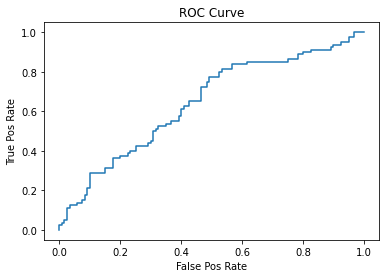

Area under the curve:  0.5854166666666667


In [565]:
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.show()
print('Area under the curve: ',auc)

In [566]:
# Changing the threshold or classifier cutoff

In [567]:
thres = 0.55
y_pred_55 = (y_pred_soft[:,1]>thres).astype(int)

In [568]:
y_pred_55

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

In [569]:
validation(y_test,y_pred_55)

Confusion Matrix
 [[108  12]
 [ 63  17]]
Accuracy:  0.625
Recall:  0.2125
Precision:  0.5862068965517241
F1 Score:  0.3119266055045871


In [571]:
thres = 0.60
y_pred_60 = (y_pred_soft[:,1]>thres).astype(int)

In [573]:
validation(y_test,y_pred_60)

Confusion Matrix
 [[117   3]
 [ 72   8]]
Accuracy:  0.625
Recall:  0.1
Precision:  0.7272727272727273
F1 Score:  0.17582417582417584
